#data

In [ ]:
# Węzły to użytkownicy LastFM z krajów azjatyckich, a krawędzie to wzajemne relacje obserwowania między nimi.
# Każdy z węzłów ma przypisaną etykietę oznaczającą kraj użytkownika.
# Cechy wierzchołków są wydobywane na podstawie artystów lubianych przez użytkowników.
# Klasyfikacja węzłów - trzeba przewidzieć lokalizację użytkowników.
# Można wprowadzić utrudnienia - dostęp tylko do krawędzi lub cech.
!wget https://snap.stanford.edu/data/lastfm_asia.zip
!unzip lastfm_asia.zip

--2023-05-18 15:44:09--  https://snap.stanford.edu/data/lastfm_asia.zip
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6527202 (6.2M) [application/zip]
Saving to: ‘lastfm_asia.zip’

lastfm_asia.zip     100%[===================>]   6.22M  1.96MB/s    in 3.2s    

2023-05-18 15:44:13 (1.96 MB/s) - ‘lastfm_asia.zip’ saved [6527202/6527202]

Archive:  lastfm_asia.zip
   creating: lasftm_asia/
  inflating: lasftm_asia/lastfm_asia_edges.csv  
  inflating: lasftm_asia/lastfm_asia_target.csv  
  inflating: lasftm_asia/lastfm_asia_features.json  
  inflating: lasftm_asia/README.txt  


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# read features
with open('/content/lasftm_asia/lastfm_asia_features.json', 'r') as f:
    js = json.load(f)

# convert to pandas 
features = pd.DataFrame.from_dict(js, orient='index')

print(f"num of nodes: {len(js.keys())}")
print(f"num of unique features: {len(np.unique(features.values.flatten()))}")
print(f"max num of features per node: {features.shape[1]}")

num of nodes: 7624
num of unique features: 7843
max num of features per node: 944


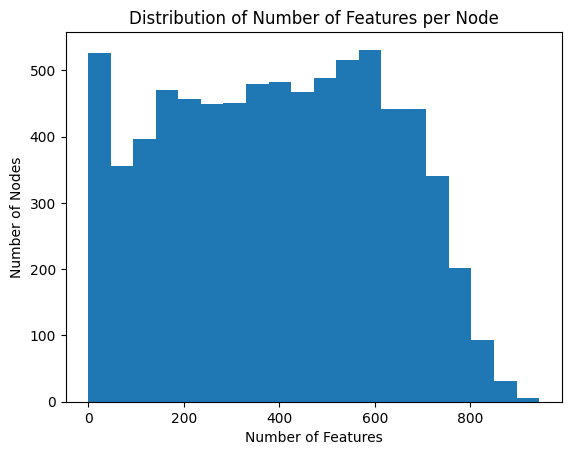

In [ ]:
# get number of features for each node
num_features = features.count(axis=1)

# plot histogram of number of features
fig, ax = plt.subplots()
ax.hist(num_features, bins=20)
ax.set_xlabel('Number of Features')
ax.set_ylabel('Number of Nodes')
ax.set_title('Distribution of Number of Features per Node')
fig.set_facecolor('w') 

In [ ]:
# read nodes and edges
nodes = pd.read_csv('/content/lasftm_asia/lastfm_asia_target.csv')
edges = pd.read_csv('/content/lasftm_asia/lastfm_asia_edges.csv')

print(f"num of nodes: {nodes['id'].nunique()}")
print(f"num of labels: {nodes['target'].nunique()}")

print("\nnodes:")
print(nodes.head())
print(nodes.shape)

print("\nedges:")
print(edges.head())
print(edges.shape)

num of nodes: 7624
num of labels: 18

nodes:
   id  target
0   0       8
1   1      17
2   2       3
3   3      17
4   4       5
(7624, 2)

edges:
   node_1  node_2
0       0     747
1       1    4257
2       1    2194
3       1     580
4       1    6478
(27806, 2)


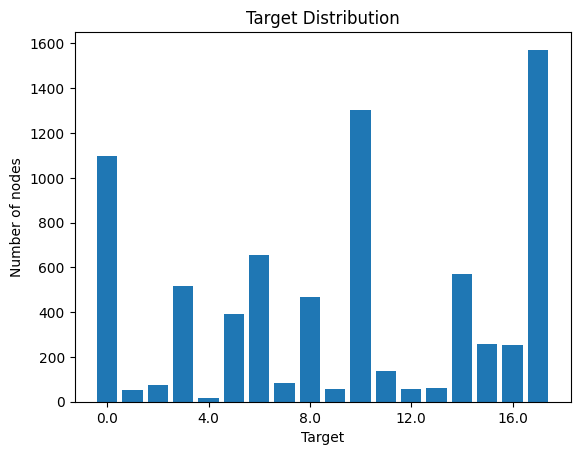

In [ ]:
import matplotlib.pyplot as plt

# Group the data by target and count the number of occurrences of each target
target_counts = nodes.groupby('target')['id'].count()

# Create the plot
fig, ax = plt.subplots()
ax.bar(target_counts.index, target_counts.values)
ax.set_xlabel('Target')
ax.set_ylabel('Number of nodes')
ax.set_title('Target Distribution')

# Set the x-axis ticks to display decimals only
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

fig.set_facecolor('w')
plt.show()

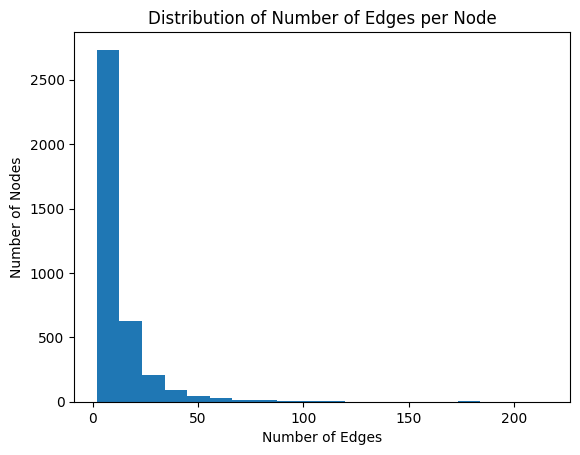

In [ ]:
# Extract the number of edges per node
num_edges = edges.groupby('node_1').size() + edges.groupby('node_2').size()

# Plot histogram of number of edges
fig, ax = plt.subplots()
ax.hist(num_edges, bins=20)
ax.set_xlabel('Number of Edges')
ax.set_ylabel('Number of Nodes')
ax.set_title('Distribution of Number of Edges per Node')
fig.set_facecolor('w')

plt.show()

# binary features

In [ ]:
# replace NaN values with -1
features.fillna(value=-1, inplace=True)

# create binary feature matrix
num_nodes = features.shape[0]
num_features = len(np.unique(features.values.flatten())) + 1 # assuming the feature indices start at 0
binary_features = np.zeros((num_nodes, num_features), dtype=int)

for i in range(num_nodes):
    # get the features for the current node
    node_features = features.iloc[i].values
    
    # set the values in the corresponding columns to 1
    binary_features[i, node_features.astype(int)] = 1

print(f"num of nodes: {binary_features.shape[0]}")
print(f"num of features: {binary_features.shape[1]}")

num of nodes: 7624
num of features: 7844


In [ ]:
binary_features.shape

(7624, 7844)

In [ ]:
binary_features

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

# binary edges

In [ ]:
# extract node IDs and target labels
node_ids = nodes['id'].values
labels = nodes['target'].values

# initialize numpy arrays with zeros
num_nodes = node_ids.shape[0]
binary_edges = np.zeros((num_nodes, num_nodes), dtype=int)

# set features to 1 for nodes that have edges
for node_1, node_2 in edges[['node_1', 'node_2']].values:
    node_1_idx = np.where(node_ids == node_1)[0][0]
    node_2_idx = np.where(node_ids == node_2)[0][0]
    binary_edges[node_1_idx, node_2_idx] = 1

In [ ]:
binary_edges.shape

(7624, 7624)

In [ ]:
edges[:12]

,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478
5,1,1222
6,1,5735
7,1,7146
8,1,2204
9,1,126


In [ ]:
binary_edges[1]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
sum(binary_edges[1])

10

In [ ]:
nonzero_indices = binary_edges[1].nonzero()[0]
print(f"Non-zero feature indices for node {1}: {nonzero_indices}")

Non-zero feature indices for node 1: [ 126  580 1222 2194 2204 2639 4257 5735 6478 7146]


In [ ]:
nonzero_indices = binary_edges[126].nonzero()[0]
print(f"Non-zero feature indices for node {126}: {nonzero_indices}")

Non-zero feature indices for node 126: [ 700 3119 5718 6562 6577]


# classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_edges, labels, test_size=0.1)

# train a random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.6160


In [ ]:
# extract target labels
labels = nodes['target'].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_features, labels, test_size=0.1)

# train a random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.7038


In [ ]:
# extract target labels
labels = nodes['target'].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_features, labels, test_size=0.1)

# train a random forest classifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.7117


In [ ]:
# concatenate edges and feature
binary_features_and_edges = np.concatenate([binary_features, binary_edges], axis=1)
binary_features_and_edges.shape

(7624, 15468)

In [ ]:
# extract target labels
labels = nodes['target'].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_features_and_edges, labels, test_size=0.1)

# train a random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.7182


In [ ]:
# extract target labels
labels = nodes['target'].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_features_and_edges, labels, test_size=0.1)

# train a random forest classifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.7379


In [ ]:
# extract target labels
labels = nodes['target'].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_features_and_edges, labels, test_size=0.1)

# train a random forest classifier
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.7248


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# extract target labels
labels = nodes['target'].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_features, labels, test_size=0.1)

# train a k-Nearest Neighbors classifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.3866


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# extract target labels
labels = nodes['target'].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_features, labels, test_size=0.1)

# train a k-Nearest Neighbors classifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.4233


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# extract target labels
labels = nodes['target'].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_features_and_edges, labels, test_size=0.1)

# train a k-Nearest Neighbors classifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.4010


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# extract target labels
labels = nodes['target'].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_features, labels, test_size=0.1)

# train a k-Nearest Neighbors classifier
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.4128


# distance search

In [ ]:
!pip install hexhamming  # fast hamming lib in C
from hexhamming import hamming_distance_bytes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
def hamming_bytes(x,y): # for gallery list
    '''
    calculate hamming distance between row x and matrix y
    '''
    results = np.zeros(len(y), dtype='uint16')
    # results = [None] * len(y)
    for i, yi in enumerate(y):
        results[i] = hamming_distance_bytes(x, yi)
        
    return results

In [ ]:
# extract target labels
labels = nodes['target'].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_features, labels, test_size=0.1)

# convert to bytestring
query_bytes = [bytes(np.packbits(row)) for row in X_test]
gallery_bytes = [bytes(np.packbits(row)) for row in X_train]

In [ ]:
# result distances up to vector length
result = np.zeros((X_test.shape[0], X_train.shape[0]), dtype='uint16')

for i, query in enumerate(query_bytes):
    result[i] = hamming_bytes(query, gallery_bytes)

In [ ]:
print(f"result shape: {result.shape}")
print(result)

result shape: (763, 6861)


array([[422, 498, 237, ..., 105, 498, 329],
       [743, 863, 638, ..., 498, 821, 646],
       [744, 836, 583, ..., 449, 784, 611],
       ...,
       [703, 791, 498, ..., 416, 773, 640],
       [664, 742, 525, ..., 419, 708, 557],
       [570, 700, 443, ..., 329, 654, 523]], dtype=uint16)

In [ ]:
# Sort the matrix along axis 1 (rows)
sorted_res = np.argsort(result, axis=1)
print(f"most similar ids for each row:\n{sorted_res}")

most similar ids for each row:
[[4475 3430 4619 ...  793 5566 5158]
 [1657  910 2321 ... 1354 5721 5649]
 [ 493 4532 5082 ... 3880 2726 2093]
 ...
 [6070 2955 1178 ... 6223 5566 5158]
 [1832  493 2389 ... 1079 2093 3880]
 [4447 4194 6094 ... 1831 1363 3880]]


In [ ]:
# visualize performance
n=10
for i, row in enumerate(sorted_res[0:n, 0:n]):
    print(f"{y_test[i]}:", end=" ")
    for id in row:
        print(y_train[id], end=" ")
    print("")

17: 14 5 0 0 14 6 17 0 0 0 
14: 17 17 14 14 14 14 17 0 17 0 
5: 10 10 5 17 17 17 17 7 10 17 
17: 10 10 17 10 17 17 10 17 14 10 
14: 14 0 15 14 14 14 13 3 8 0 
0: 5 5 8 5 14 5 5 5 14 5 
5: 0 10 10 17 3 17 10 17 15 17 
17: 5 17 6 0 0 10 3 0 14 15 
10: 10 17 10 10 10 17 17 10 17 10 
17: 10 3 10 15 9 15 10 17 17 10 


In [ ]:
# Create a list to hold the predicted labels
y_pred = []

k=15

# Iterate over each row in the test set
for i in range(len(X_test)):
    # Get the ids of the closest nodes for this row
    closest_ids = sorted_res[i, :k]
    # Get the corresponding labels for these nodes
    closest_labels = y_train[closest_ids]
    # Take the majority vote of the labels
    pred_label = np.bincount(closest_labels).argmax()
    # Add the predicted label to the list
    y_pred.append(pred_label)

# Convert the list of predicted labels to a numpy array
y_pred = np.array(y_pred)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.4063


# centorids

In [ ]:
# mean centroids
df = pd.DataFrame(X_train)
df['label'] = y_train

# Group the feature matrix by label and compute the mean of each group
centroids = df.groupby('label').mean()

# Convert the centroids to numpy array
centroids = np.array(centroids)

# Print the shape of the centroids array
print(f"Centroids shape: {centroids.shape}")

Centroids shape: (18, 7844)


In [ ]:
centroids[centroids>0.5]

In [ ]:
from sklearn.metrics.pairwise import cosine_distances

# Calculate the cosine distance between each feature vector in X_test and each centroid
distances = cosine_distances(X_test, centroids)

# Get the indices of the closest centroid for each feature vector in X_test
closest_ids = np.argmin(distances, axis=1)

# Calculate the accuracy
accuracy = np.mean(closest_ids == y_test)

# Print the accuracy as a percentage
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 47.71%


In [ ]:
# analiza grafowa dla 3 klas z lib
# wybrac 2 podjescia i policzyc metryki jak sie zachowuja mniejszosciowe klasy

In [ ]:
X_train.shape

(6861, 7844)

In [ ]:
# binary centroids
binary_centroids = (centroids > 0.5).astype(int)

In [ ]:
binary_centroids.shape

(18, 7844)

In [ ]:
# convert to bytestring
query_bytes = [bytes(np.packbits(row)) for row in X_test]
gallery_bytes = [bytes(np.packbits(row)) for row in binary_centroids]

In [ ]:
# result distances up to vector length
result = np.zeros((X_test.shape[0], binary_centroids.shape[0]), dtype='uint16')

for i, query in enumerate(query_bytes):
    result[i] = hamming_bytes(query, gallery_bytes)

In [ ]:
# Sort the matrix along axis 1 (rows)
sorted_res = np.argsort(result, axis=1)
print(f"most similar ids for each row:\n{sorted_res}")

most similar ids for each row:
[[17  7  5 ...  6  0 11]
 [ 6  0 16 ...  1 15  2]
 [ 2  8 14 ...  4 10 11]
 ...
 [10  9 15 ...  2  6  0]
 [ 8 14  2 ...  4 13 11]
 [10 11  0 ...  5  7 17]]


In [ ]:
# visualize performance
n=10
for i, row in enumerate(sorted_res[0:n, 0:n]):
    print(f"{y_test[i]}:", end=" ")
    for id in row:
        print(y_train[id], end=" ")
    print("")

17: 5 14 10 15 0 17 6 10 0 10 
14: 6 6 15 0 6 10 10 6 5 17 
5: 17 10 0 5 10 14 15 17 0 10 
17: 6 0 6 16 10 17 0 15 10 10 
14: 6 6 0 10 16 17 0 15 17 6 
0: 5 14 10 10 0 15 17 17 0 6 
5: 0 17 10 14 5 6 16 15 10 0 
17: 5 14 10 15 0 6 17 10 0 10 
10: 14 5 0 10 6 0 15 17 10 10 
17: 10 15 10 14 5 0 0 17 6 0 


In [ ]:
# Create a list to hold the predicted labels
y_pred = []

k=15

# Iterate over each row in the test set
for i in range(len(X_test)):
    # Get the ids of the closest nodes for this row
    closest_ids = sorted_res[i, :k]
    # Get the corresponding labels for these nodes
    closest_labels = y_train[closest_ids]
    # Take the majority vote of the labels
    pred_label = np.bincount(closest_labels).argmax()
    # Add the predicted label to the list
    y_pred.append(pred_label)

# Convert the list of predicted labels to a numpy array
y_pred = np.array(y_pred)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.1769


# NN

In [ ]:
# create the adjacency matrix
adj_matrix = np.zeros((nodes['id'].nunique(), nodes['id'].nunique()))
for _, row in edges.iterrows():
    adj_matrix[row['node_1'], row['node_2']] = 1
    # adj_matrix[row['node_2'], row['node_1']] = 1

# create the feature matrix
feature_matrix = features_df.values

# create the target labels
target_labels = nodes['target'].values

In [ ]:
adj_matrix.shape

(7624, 7624)

In [ ]:
feature_matrix.shape

(7624, 944)

In [ ]:
target_labels.shape

(7624,)

In [ ]:
!pip install torch-geometric

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# define the graph convolutional network model
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(feature_matrix.shape[1], 16)
        self.conv2 = GCNConv(16, np.unique(target_labels))

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)



In [ ]:
# convert the data to PyTorch tensors
# edge_index = torch.tensor(edges.values.T, dtype=torch.long)
edge_index = torch.tensor(np.transpose(np.nonzero(adj_matrix)), dtype=torch.long)
x = torch.tensor(feature_matrix, dtype=torch.float)
y = torch.tensor(target_labels, dtype=torch.long)

# define the device to run the model on
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# initialize the model and move it to the device
model = Net()
model.to(device)

# define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.NLLLoss()

# train the model
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    output = model(x.to(device), edge_index.to(device))
    loss = criterion(output, y.to(device))
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')

# evaluate the model
model.eval()
with torch.no_grad():
    output = model(x.to(device), edge_index.to(device))
    pred = output.argmax(dim=1)
    acc = (pred == y.to(device)).sum().item() / y.shape[0]
    print(f'Test Accuracy: {acc:.4f}')

TypeError: ignored

In [ ]:
np.unique(targets)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])